In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics
import mysql.connector
import networkx as nx
import numpy as np
import csv
import pandas as pd

In [2]:
# Establish database connection
cnx = mysql.connector.connect(user='david', password='daviddung1993',
                              host='127.0.0.1',
                              database='computervision')
cursor = cnx.cursor()

# Papers Analysis

In [3]:
cursor.execute("SELECT count(*) FROM Papers p WHERE p.Leaf = TRUE")
total_paper_without_references = cursor.fetchone()[0]
cursor.execute("SELECT count(*) FROM Papers p WHERE p.Leaf = FALSE and p.ReferenceCount is not null")
total_paper_with_references = cursor.fetchone()[0]
cursor.execute("SELECT count(*) FROM Papers p WHERE p.Leaf = FALSE AND p.ReferenceCount > 0")
total_paper_at_least_one = cursor.fetchone()[0]
print(f"Total papers: {total_paper_without_references + total_paper_with_references}")
print(f"Paper references: {total_paper_without_references}")
print(f"Papers: {total_paper_with_references}")
print(f"Papers with at least one reference: {total_paper_at_least_one}")

Total papers: 589392
Paper references: 513793
Papers: 75599
Papers with at least one reference: 75599


In [4]:
cursor.execute("SELECT count(*) FROM Authors a")
total_authors = cursor.fetchone()[0]
cursor.execute("SELECT count(distinct a.AuthorID) from Papers p, Authors a, authoredBy b WHERE p.leaf = False and p.PaperID = b.PaperID and b.AuthoredByID = a.AuthorID")
total_authors_with_references = cursor.fetchone()[0]
print(f"Total authors: {total_authors}")
print(f"Total authors with references: {total_authors_with_references}")
print(f"Avg Authors per paper: {total_authors_with_references/total_paper_with_references}")


Total authors: 733726
Total authors with references: 120500
Avg Authors per paper: 1.5939364277305255


In [5]:
len(author_counts)

NameError: name 'author_counts' is not defined

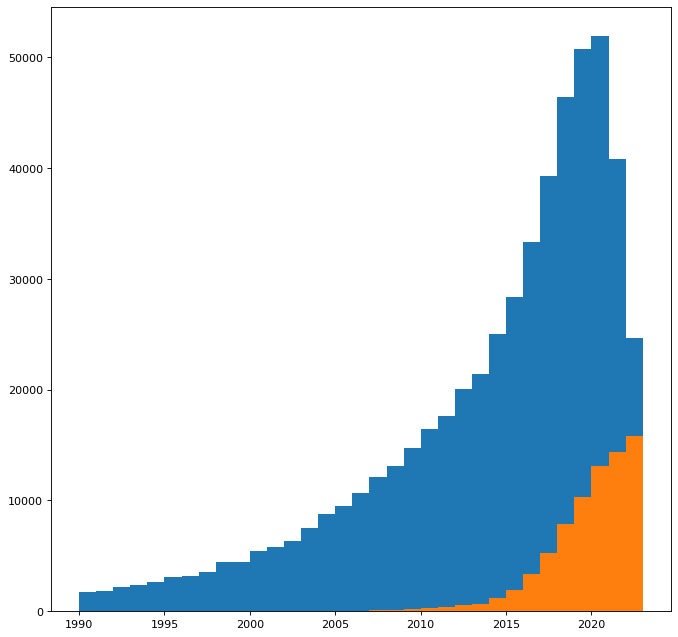

In [6]:
cursor.execute("SELECT p.Pub_Year FROM Papers p")
year_distribution_all = [pub_year[0] for pub_year in cursor.fetchall() if pub_year[0]]
cursor.execute("SELECT p.Pub_Year FROM Papers p WHERE p.Leaf = FALSE")
year_distribution = [pub_year[0] for pub_year in cursor.fetchall() if pub_year[0]]
figure(figsize=(10, 10), dpi=80)
plt.hist(year_distribution_all, bins=33, range=(1990,2023))
plt.hist(year_distribution, bins=33, range=(1990,2023))
plt.show()

In [8]:
cursor.execute("SELECT p.journalName,COUNT(distinct p.PaperID) FROM Papers p group by p.journalName")
journalDistribution = cursor.fetchall()

In [9]:
journalDistribution = sorted(journalDistribution, key=lambda tup: tup[1], reverse=True)
journalDistribution

[('', 33333),
 ('ArXiv', 3828),
 ('IEEE Transactions on Pattern Analysis and Machine Intelligence', 1316),
 ('IEEE Transactions on Image Processing', 1005),
 ('Pattern Recognit.', 920),
 ('International Journal of Computer Vision', 733),
 ('IEEE Trans. Pattern Anal. Mach. Intell.', 525),
 ('Pattern Recognit. Lett.', 507),
 ('IEEE Transactions on Medical Imaging', 487),
 ('Comput. Vis. Image Underst.', 341),
 ('Image Vis. Comput.', 340),
 ('IEEE transactions on image processing : a publication of the IEEE Signal Processing Society',
  330),
 ('2014 IEEE Conference on Computer Vision and Pattern Recognition', 324),
 ('2015 IEEE Conference on Computer Vision and Pattern Recognition (CVPR)',
  319),
 ('2013 IEEE Conference on Computer Vision and Pattern Recognition', 306),
 ('2012 IEEE Conference on Computer Vision and Pattern Recognition', 304),
 ('J. Mach. Learn. Res.', 296),
 ('2013 IEEE International Conference on Computer Vision', 286),
 ('IEEE Transactions on Geoscience and Remote Se

# Affiliations

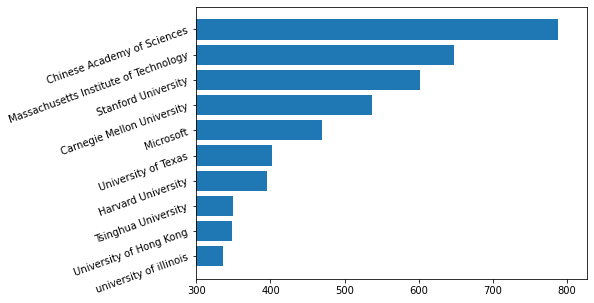

In [4]:
cursor.execute("select Name, count(*) from affiliatedTo a, Affiliations a2 where a.affiliatedTo = a2.AffiliationID group by affiliatedTo, Name order by count(*) DESC")
data = cursor.fetchall()
labels = list(reversed([x[0] for x in data][1:11]))
aff_distribution = list(reversed([x[1] for x in data][1:11]))
y_pos = np.arange(len(aff_distribution))
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_yticks(y_pos, labels=labels)
ax.barh(y_pos, aff_distribution, align='center')
ax.set_xlim(xmin=300)
ax.tick_params(axis='y', labelrotation=20)

1.7390723027872057
1


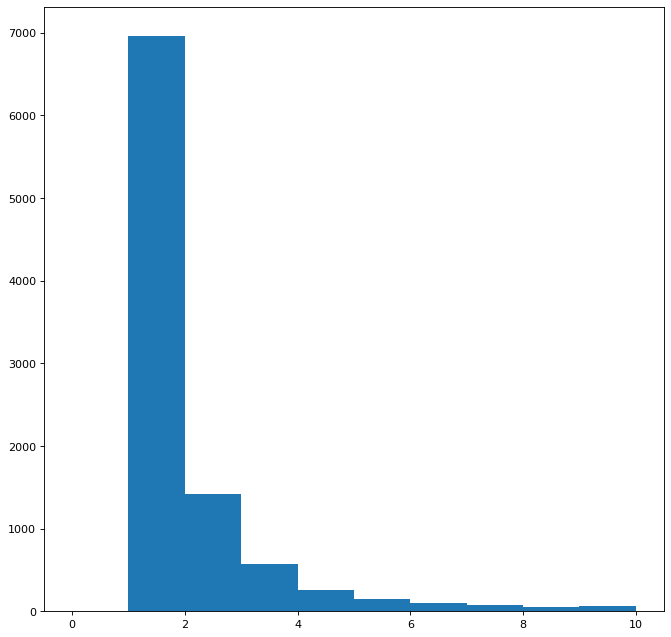

In [6]:
cursor.execute("SELECT count(*) from Papers p, Authors a, authoredBy b WHERE p.leaf = False and p.PaperID = b.PaperID and b.AuthoredByID = a.AuthorID GROUP BY a.AuthorID, a.Name")
author_counts = sorted([author_count[0] for author_count in cursor.fetchall()])
print(statistics.mean(author_counts))
print(statistics.median(author_counts))
figure(figsize=(10, 10),dpi=80)
plt.hist(author_counts, bins=10, range=(0,10))
plt.show()

# Countries

In [7]:
cursor.execute("select Country, count(*) from Affiliations a, affiliatedTo a2 where a.AffiliationID = a2.affiliatedTo group by Country order by count(*) DESC ")
country_distribution = cursor.fetchall()

In [8]:
labels = [country[0] for country in country_distribution]
amounts = [country[1] for country in country_distribution]

In [11]:
final_amount = amounts[:13]
final_amount.append(sum(amounts[13:]))
final_label = labels[:13]
final_label.append("other")

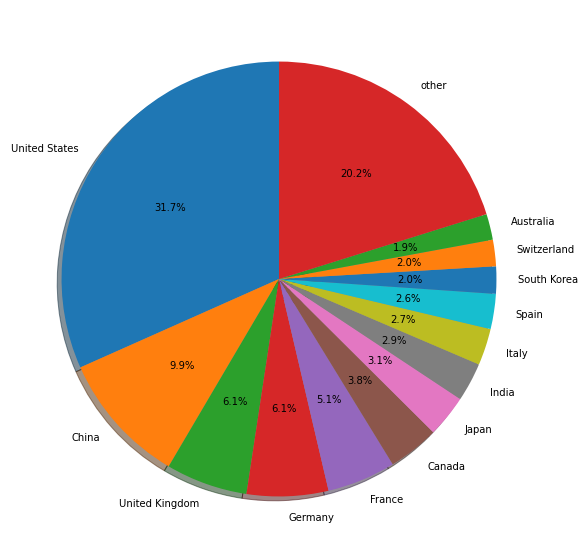

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(final_amount, labels=final_label, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

# Gender

In [5]:
cursor.execute("select Gender, count(*) from Authors group by Gender")
gender_distribution = cursor.fetchall()
gender_distribution

[(None, 1167), (0, 78012), (1, 17416)]

In [6]:
cursor.execute("select af.Name, a.Gender, count(*) from Authors a, affiliatedTo t, Affiliations af where a.AuthorID = t.AuthorID and t.affiliatedTo = af.AffiliationID group by af.Name, a.Gender")
gender_aff_distribution_raw = cursor.fetchall()
gender_aff_distribution_raw

[('None', None, 1),
 ('University of Alberta', 0, 88),
 ('University of Alberta', 1, 22),
 ('Alberta Machine Intelligence Institute', 0, 1),
 ('Synapse Partners', 0, 1),
 ('SRI International', 0, 63),
 ('SRI International', 1, 13),
 ('Universidad de Málaga', 0, 30),
 ('Universidad de Málaga', 1, 6),
 ('University of Cambridge', 0, 199),
 ('University of Cambridge', 1, 31),
 ('University of Cambridge', None, 1),
 ('Duke University', 0, 151),
 ('Duke University', 1, 38),
 ('Duke University', None, 1),
 ('California Institute of Technology', None, 2),
 ('California Institute of Technology', 0, 199),
 ('California Institute of Technology', 1, 28),
 ('ATR', 0, 1),
 ('Ritsumeikan University', 0, 15),
 ('McGill University', 0, 89),
 ('McGill University', 1, 24),
 ('University of British Columbia', 0, 141),
 ('University of British Columbia', None, 2),
 ('University of British Columbia', 1, 23),
 ('University of Southern California', 0, 200),
 ('University of Southern California', 1, 32),
 ('U

In [7]:
gender_aff_distribution_dict = {}
gender_aff_distribution = {}
for gender_amount in gender_aff_distribution_raw:
    if gender_amount[0] not in gender_aff_distribution_dict:
        gender_aff_distribution_dict[gender_amount[0]] = {}
    gender_aff_distribution_dict[gender_amount[0]][gender_amount[1]] = gender_amount[2]
for gender_aff in gender_aff_distribution_dict.items():
    curret_key = gender_aff[0]
    gender_aff = gender_aff[1]
    current_dist = []
    total = 0
    if 0 in gender_aff:
        current_dist.append(gender_aff[0])
        total += gender_aff[0]
    else:
        current_dist.append(0)
    if 1 in gender_aff:
        current_dist.append(gender_aff[1])
        total += gender_aff[1]
    else:
        current_dist.append(0)
    if None in gender_aff:
        current_dist.append(gender_aff[None])
        total += gender_aff[None]
    else:
        current_dist.append(0)
    current_dist.append(total)
    gender_aff_distribution[curret_key] = current_dist

In [8]:
sorted_gender_aff_distribution = {k: v for k, v in sorted(gender_aff_distribution.items(), key=lambda item: item[1][3], reverse=True)}
male =  [x[0] for x in sorted_gender_aff_distribution.values()][1:11]
female =  [x[1] for x in sorted_gender_aff_distribution.values()][1:11]
none_gender =  [x[2] for x in sorted_gender_aff_distribution.values()][1:11]
labels = [label for label in sorted_gender_aff_distribution][1:11]
most_male =  [(x[0],x[1][0]/x[1][3]) for x in sorted_gender_aff_distribution.items() if x[1][3] > 200]
most_female =  [(x[0],x[1][1]/x[1][3]) for x in sorted_gender_aff_distribution.items() if x[1][3] > 200]
{k: v for k, v in sorted(most_male, key=lambda item: item[1], reverse=True)}

{'Technische Universität München': 0.9247787610619469,
 'Google': 0.9,
 'Siemens': 0.8936170212765957,
 'ETH Zurich': 0.8925373134328358,
 'Imperial College London': 0.8820754716981132,
 'California Institute of Technology': 0.868995633187773,
 'University of Oxford': 0.8648648648648649,
 'University of Cambridge': 0.8614718614718615,
 'University of Minnesota': 0.8598130841121495,
 'University of Southern California': 0.8547008547008547,
 'Johns Hopkins University': 0.8543307086614174,
 'Max-Planck-Institut': 0.8533333333333334,
 'IBM': 0.8513931888544891,
 'Massachusetts Institute of Technology': 0.8472222222222222,
 'Purdue University': 0.84688995215311,
 'Carnegie Mellon University': 0.8406593406593407,
 'Georgia Institute of Technology': 0.8373702422145328,
 'Stanford University': 0.8355481727574751,
 'university of illinois': 0.8333333333333334,
 'Inria': 0.8239700374531835,
 'University of California': 0.823965410747375,
 'Microsoft': 0.8230277185501066,
 'Swiss Federal Institut

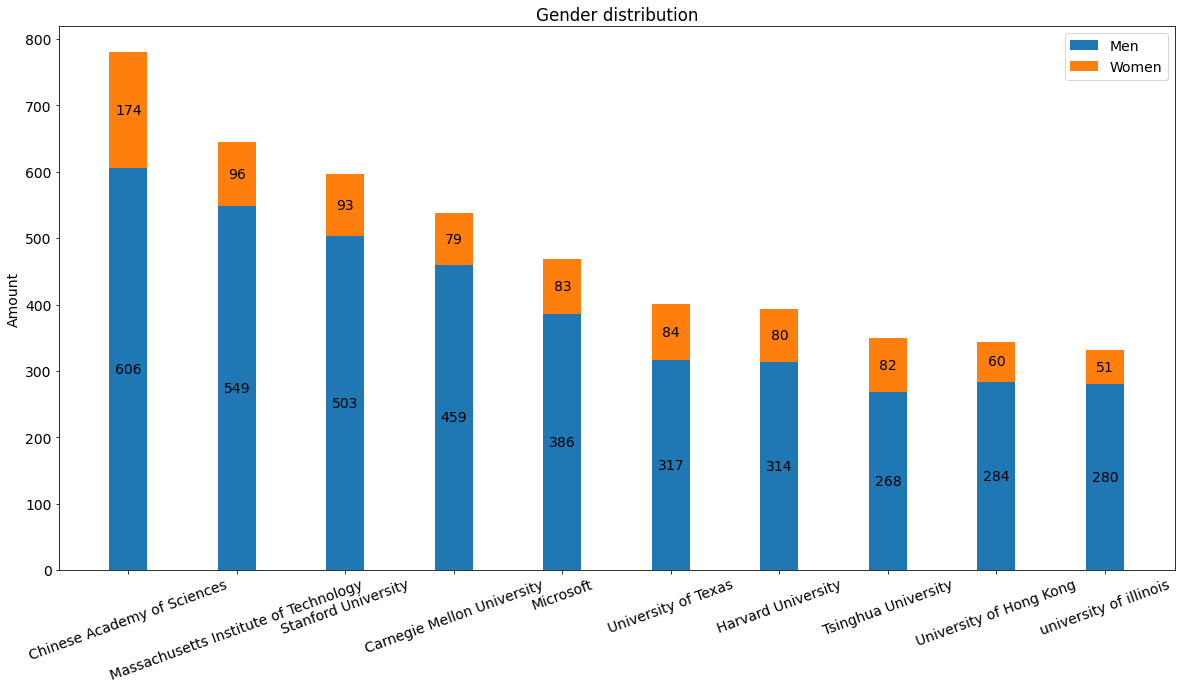

In [22]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(20, 10))

width = 0.35
p1 = ax.bar(labels, male, width, label='Men')
p2 = ax.bar(labels, female, width, bottom=male,
       label='Women')
ax.tick_params(axis='x', labelrotation=20)
ax.set_ylabel('Amount')
ax.set_title('Gender distribution')
ax.legend()
ax.bar_label(p1, label_type="center")
ax.bar_label(p2, label_type="center")
plt.show()

# Authors

325


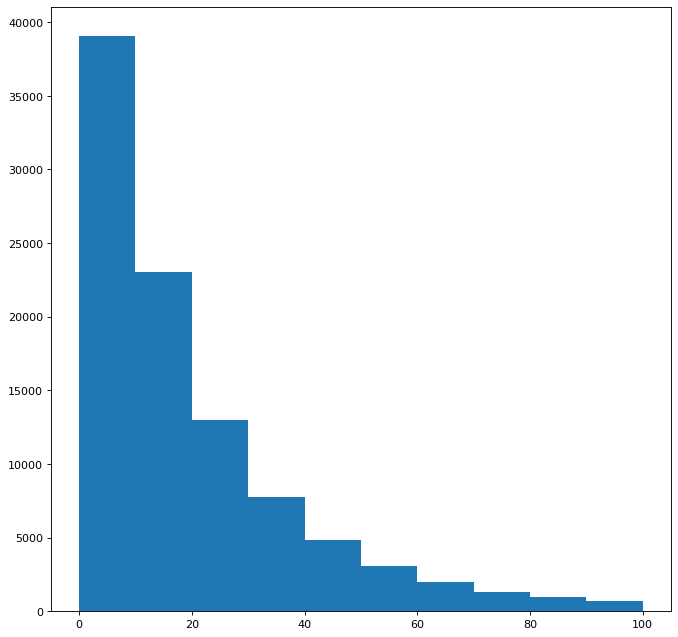

In [14]:
cursor.execute("select a.hIndex from Authors a where a.hIndex is not NULL")
hIndex_values = [x[0] for x in cursor.fetchall()]
print(max(hIndex_values))
figure(figsize=(10, 10), dpi=80)
plt.hist(hIndex_values, bins=10, range=(0,100))

plt.show()

# Reference Analysis

In [14]:
cursor.execute("SELECT AVG(p.ReferenceCount) FROM Papers p WHERE p.Leaf = FALSE")
avg_references = float(cursor.fetchone()[0])
cursor.execute("SELECT p.ReferenceCount FROM Papers p WHERE p.Leaf = FALSE")
reference_count = statistics.median([ref[0] for ref in cursor.fetchall()])
cursor.execute("SELECT MIN(p.ReferenceCount), MAX(p.ReferenceCount) FROM Papers p WHERE p.Leaf = FALSE")
borders = cursor.fetchall()[0]
print(f"Average references: {avg_references}")
print(f"Median references: {reference_count}")
print(f"Min: {borders[0]}")
print(f"Max: {borders[1]}")

Average references: 31.0119
Median references: 29.0
Min: 1
Max: 70


In [144]:
y

[]

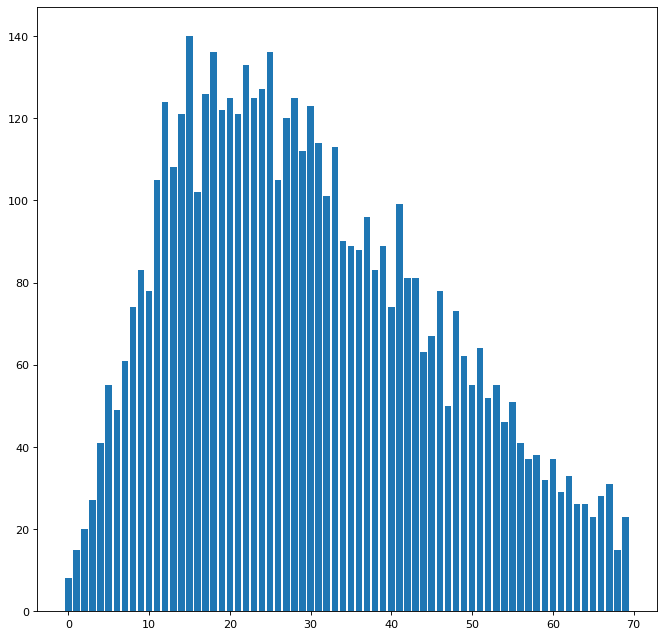

In [3]:
cursor.execute("SELECT p.ReferenceCount, count(*) FROM Papers p WHERE p.Leaf = FALSE group by p.ReferenceCount order by p.ReferenceCount")
items = cursor.fetchall()
ref_distribution = [item[1] for item in items]
cursor.execute("SELECT p.ReferenceCount, AVG(c) FROM Papers p, (select a.PaperID as paperID,count(*) as c from authoredBy a group by a.PaperID) a WHERE p.PaperID = a.PaperID and p.Leaf = FALSE group by ReferenceCount order by ReferenceCount")
items = cursor.fetchall()
avg_author_count = [item[1] for item in items]
figure(figsize=(10, 10), dpi=80)
plt.bar(list(range(len(ref_distribution))), ref_distribution)
#sns.distplot(ref_distribution, kde=True, bins=14, hist=True)
plt.show()

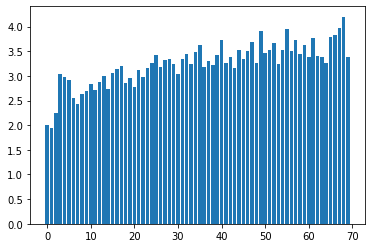

In [156]:
plt.bar(list(range(len(ref_distribution))), avg_author_count)
plt.show()

In [154]:
avg_author_count

[Decimal('2.0000'),
 Decimal('1.9333'),
 Decimal('2.2500'),
 Decimal('3.0370'),
 Decimal('2.9756'),
 Decimal('2.9091'),
 Decimal('2.5510'),
 Decimal('2.4262'),
 Decimal('2.6351'),
 Decimal('2.6867'),
 Decimal('2.8333'),
 Decimal('2.7048'),
 Decimal('2.8710'),
 Decimal('3.0000'),
 Decimal('2.7355'),
 Decimal('3.0643'),
 Decimal('3.1471'),
 Decimal('3.1984'),
 Decimal('2.8456'),
 Decimal('2.9590'),
 Decimal('2.7760'),
 Decimal('3.1157'),
 Decimal('2.9699'),
 Decimal('3.1600'),
 Decimal('3.2520'),
 Decimal('3.4191'),
 Decimal('3.1714'),
 Decimal('3.3167'),
 Decimal('3.3360'),
 Decimal('3.2411'),
 Decimal('3.0407'),
 Decimal('3.3509'),
 Decimal('3.4455'),
 Decimal('3.2478'),
 Decimal('3.4889'),
 Decimal('3.6180'),
 Decimal('3.1818'),
 Decimal('3.3021'),
 Decimal('3.2169'),
 Decimal('3.4270'),
 Decimal('3.7297'),
 Decimal('3.2626'),
 Decimal('3.3827'),
 Decimal('3.1605'),
 Decimal('3.5238'),
 Decimal('3.3433'),
 Decimal('3.5128'),
 Decimal('3.6800'),
 Decimal('3.2603'),
 Decimal('3.9032'),


In [140]:
len(ref_distribution)

5280

# Graph Analysis

In [18]:
cursor.execute("SELECT r.ReferencedByID,r.ReferenceID FROM referencedBy r")
references_all = cursor.fetchall()
cursor.execute("SELECT p.PaperID FROM Papers p")
papers_all = [paper_id[0] for paper_id in cursor.fetchall()]

In [19]:
G = nx.DiGraph()
G.add_nodes_from(papers_all)
G.add_edges_from(references_all)
nx.info(G)

/tmp/ipykernel_101238/2060462606.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'DiGraph with 552625 nodes and 2583277 edges'

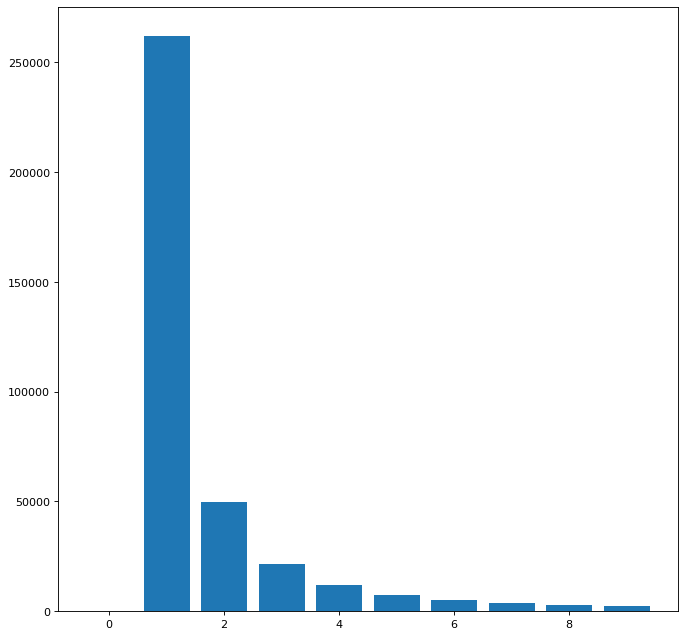

In [17]:
density = nx.density(G)
degree_hist = nx.degree_histogram(G)
figure(figsize=(10, 10), dpi=80)
plt.bar(range(len(degree_hist[0:10])), degree_hist[0:10])
plt.show()

In [20]:
print("Strong Connectivity")
print(f"Number of strongly connected components: {nx.number_strongly_connected_components(G)}")
print("Weak Connectivity")
print(f"Number of weakly connected components: {nx.number_weakly_connected_components(G)}")
weak_components_length = []
weak_components = []
for wc in nx.weakly_connected_components(G):
    weak_components_length.append(len(wc))
    weak_components.append(wc)
print(f"Unique sizes of weak components: {sorted(set(weak_components_length), reverse=True)}")


Strong Connectivity
Number of strongly connected components: 550259
Weak Connectivity
Number of weakly connected components: 442
Unique sizes of weak components: [550695, 70, 66, 61, 43, 34, 33, 32, 31, 28, 27, 26, 23, 22, 21, 19, 18, 17, 16, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [95]:
https://doi.org/10.1109/CVPR.2004.354
doi.org/10.1109/CVPR.2004.354

[465702,
 12,
 130,
 4,
 1,
 14,
 1,
 80,
 13,
 6,
 1,
 9,
 23,
 1,
 1,
 6,
 1,
 17,
 21,
 1,
 28,
 80,
 1,
 7,
 4,
 22,
 32,
 14,
 16,
 11,
 24,
 10,
 1,
 8,
 13,
 8,
 1,
 1,
 14,
 20,
 28,
 16,
 43,
 10,
 1,
 9,
 15,
 11,
 18,
 19,
 1,
 2,
 14,
 1,
 13,
 22,
 15,
 1,
 1,
 16,
 14,
 3,
 27,
 14,
 7,
 12,
 29,
 5,
 11,
 22,
 19,
 5,
 17,
 14,
 29,
 8,
 12,
 11,
 8,
 18,
 12,
 6,
 5,
 3,
 10,
 4,
 27,
 8,
 2,
 5,
 10,
 3,
 14,
 12,
 27,
 23,
 6,
 19,
 7,
 7,
 7,
 2,
 5,
 16,
 6,
 7,
 4,
 12,
 15,
 2,
 10,
 16,
 4,
 3,
 1,
 2,
 11,
 12,
 4,
 12,
 1,
 1,
 1,
 6,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 14,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,


KeyboardInterrupt: 

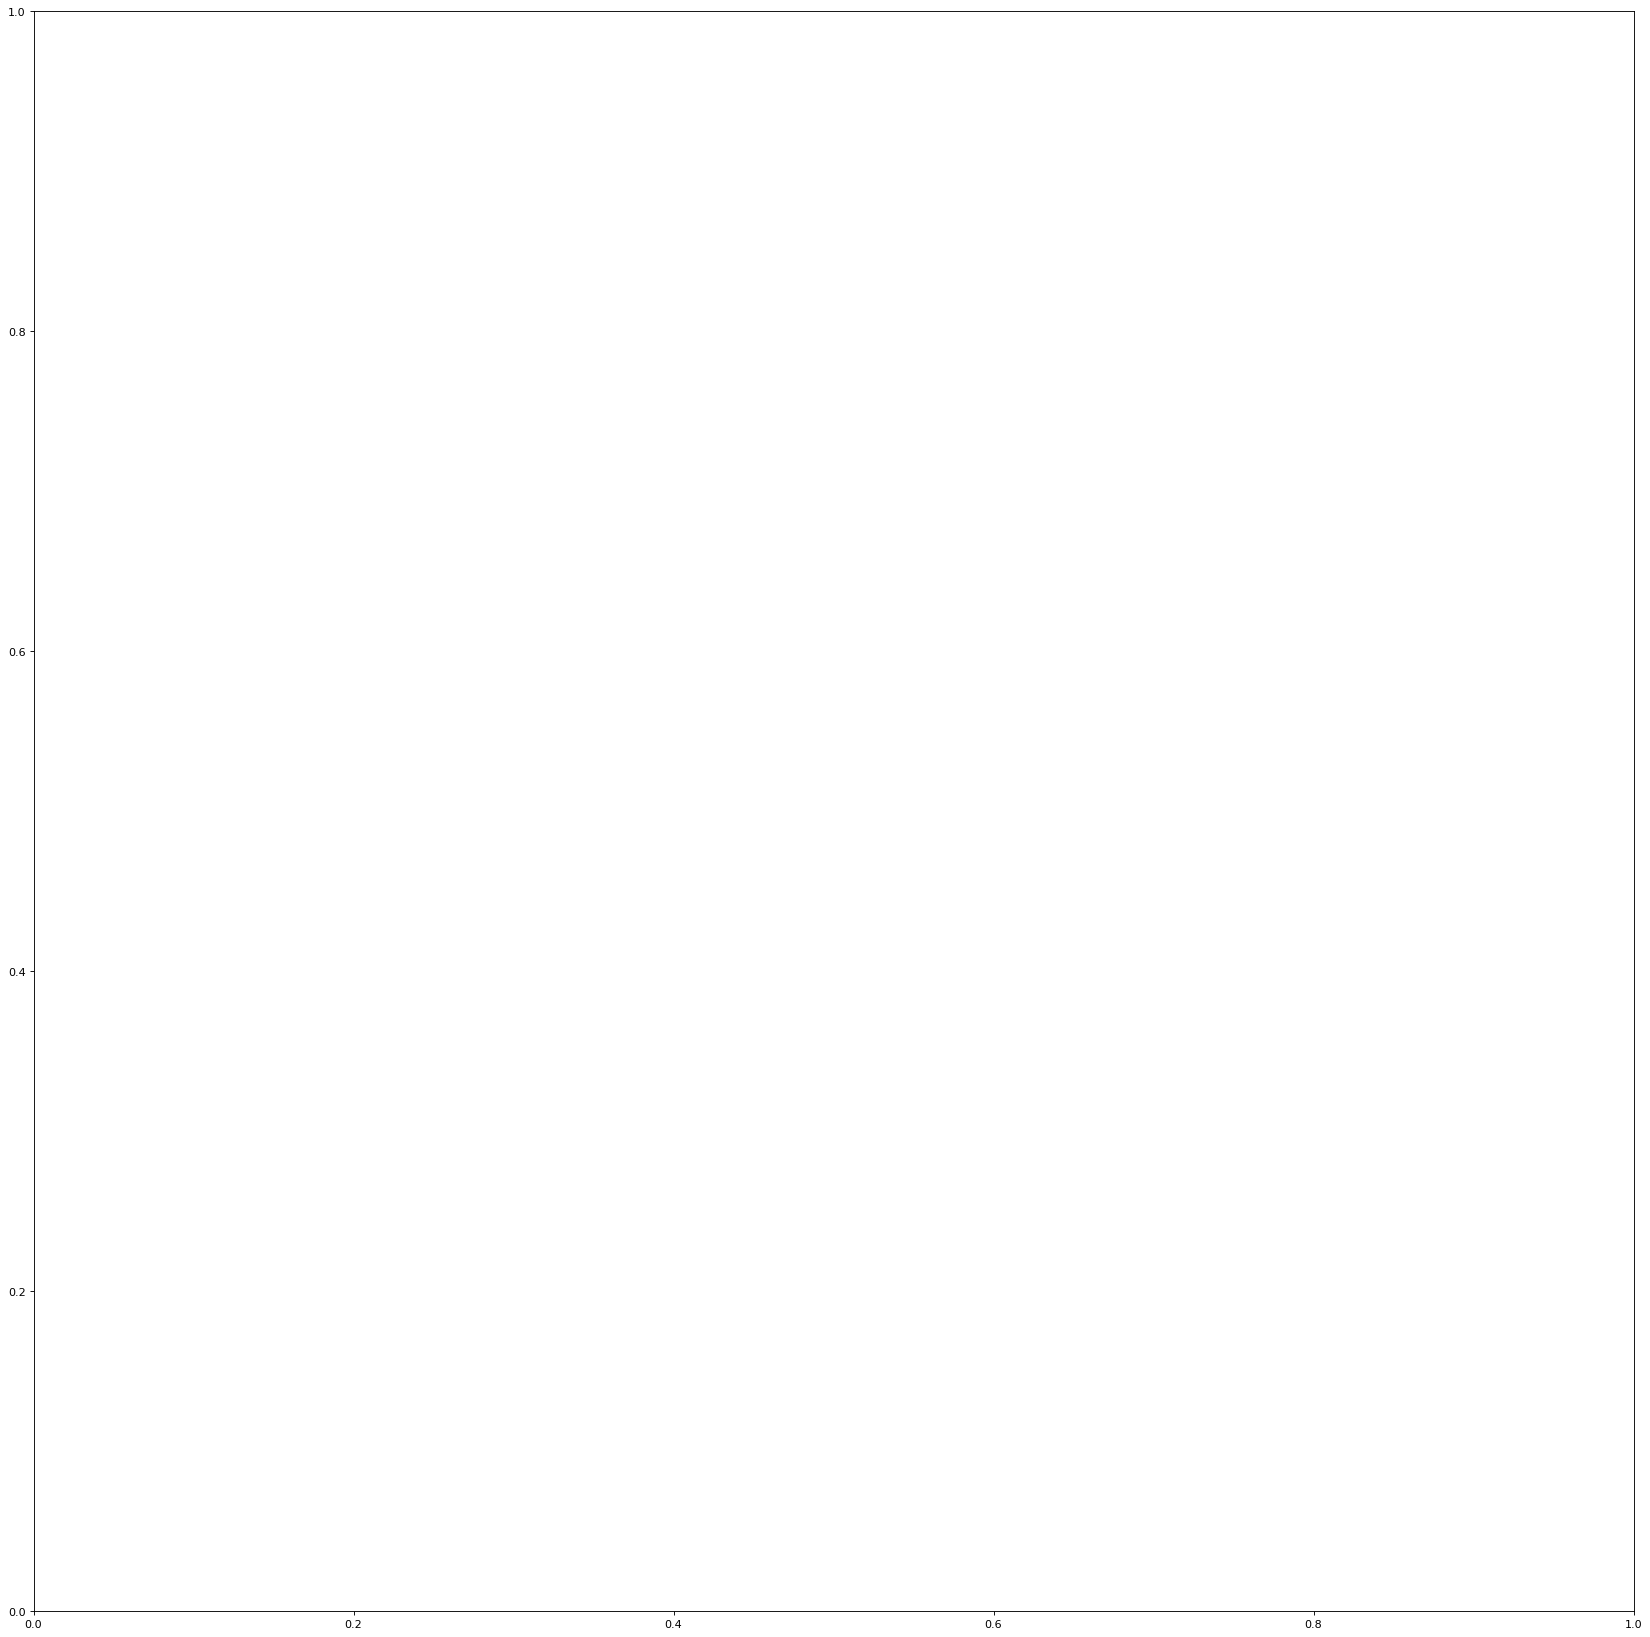

In [103]:
figure(figsize=(20, 20), dpi=80)
nx.draw(G.subgraph(weak_components[0]), with_labels=True)

In [102]:
weak_components[2]

{'00476838b45d5b3f60fdf06862a4ca8d27dd8367',
 '01f4b44581ac1a5ff5ebe478880bc7a62c90c1d5',
 '044fac84b9d17f92ef61c78e2b1875fc9ebecd44',
 '0737094480812241ee658e6098a595737752e1aa',
 '093eefe80dda51ce76ad45983356644ac9f7435d',
 '0a06fd387217f774173f15bcb90d4e59b059c4fc',
 '0a101e5305b533754c89aa1c0bb17b566adfe303',
 '0ad170bf0f17943c49187b99c0c333a1f7b7d365',
 '0c597bfdc322cc52a34713a9a9eaaaa394837f42',
 '0c643bb36feab62b2c7aa9e3c7a09a9f81ea672f',
 '0fa10e31a3ac2f8bb32058dcd0c76550352fb244',
 '110d81a1a719e3f92fd1879434f5f417f731d76e',
 '1111121b3fd3953b7464e8d912b3b072ddf37',
 '1111135512e58d58a4212a09531d6e62e83bb',
 '1111174f80b3f4ead4d14bcba56716a72e9b6',
 '11111a9deb59907b54a8db42939beec348b99',
 '11111d7af82a20b854454a1352b2f17e00829',
 '1320dee5ccc34c90c638d24fb7f69e16b8734da9',
 '13c393db70238530c2d20d136288e6af04b32c16',
 '17b6fd63db71e53613381c168f7b194e68b380a1',
 '17cfcd6627eeb7adcc45948724aeac11f4990858',
 '18750b4840625e60bfcec072fabb7189231334b6',
 '18a41aa27cbe4c2b444c829

<generator object weakly_connected_components at 0x7fa6eb9f6ff0>

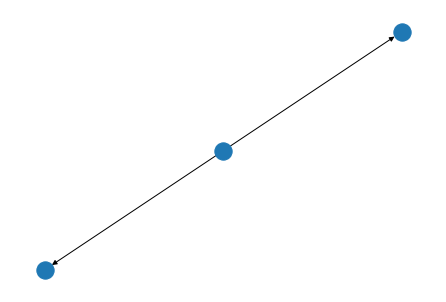

In [60]:
G2 = nx.DiGraph()
G2.add_edges_from([(1,2),(1,3)])
nx.draw(G2)

In [62]:
l = []
for x in nx.weakly_connected_components(G2):
    l.append(x)

In [63]:
l

[{1, 2, 3}]

In [2]:
from scholarly import scholarly, ProxyGenerator

pg = ProxyGenerator()
success = pg.FreeProxies()


FreeProxyException: Request to www.sslproxies.org failed

In [3]:
from fp.fp import FreeProxy
proxy = FreeProxy().get()

In [4]:
proxy

'http://116.203.199.47:8080'

In [9]:
scholarly.use_proxy(proxy)

StopIteration: 

In [23]:
cnx.close()